<a href="https://colab.research.google.com/github/ivansudibyo14/economy_growth_complexity/blob/main/EDA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Read the CSV data from the Google Sheets link
sheet_url1 = 'https://docs.google.com/spreadsheets/d/1h8a5tYTgHrTM21qQieUjT2q9ON1_pRPaA2HXf-Xm7VY/edit#gid=93464927'
sheet_url_trf1 = sheet_url1.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df = pd.read_csv(sheet_url_trf1) #define df to read csv
df.head()

,year,Argentina_gdp,Armenia_gdp,Brazil_gdp,China_gdp,Indonesia_gdp,Malaysia_gdp,Philippines_gdp,Thailand_gdp,Vietnam_gdp,...,South_Africa_eci,Armenia_eci,China_eci,Indonesia_eci,Malaysia_eci,Philippines_eci,Thailand_eci,Vietnam_eci,Argentina_eci,Brazil_eci
0,2010,10385.96,3143.03,11249.46,4550.45,3094.44,8880.11,2201.78,4996.37,1684.01,...,0.35,0.00,0.58,-0.31,0.84,0.18,0.48,-0.49,0.35,0.63
1,2011,12848.86,3462.68,13200.79,5614.35,3613.80,10209.38,2431.20,5396.65,1953.56,...,0.39,0.00,0.70,-0.26,0.93,0.32,0.60,-0.32,0.29,0.68
2,2012,13082.66,3643.72,12327.32,6300.62,3668.21,10601.51,2671.78,5748.63,2190.23,...,0.35,0.00,0.77,-0.24,0.99,0.37,0.63,-0.25,0.39,0.64
3,2013,13080.25,3833.16,12258.50,7020.34,3602.89,10727.70,2847.57,6041.13,2367.50,...,0.37,0.13,0.81,-0.22,1.02,0.38,0.71,-0.24,0.41,0.68
4,2014,12334.80,4017.23,12071.16,7636.12,3476.62,11045.45,2935.93,5822.38,2558.78,...,0.39,0.08,0.86,-0.11,1.01,0.41,0.82,-0.17,0.37,0.66


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df`
cols = df.columns
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              12 non-null     int64  
 1   Argentina_gdp     12 non-null     float64
 2   Armenia_gdp       12 non-null     float64
 3   Brazil_gdp        12 non-null     float64
 4   China_gdp         12 non-null     float64
 5   Indonesia_gdp     12 non-null     float64
 6   Malaysia_gdp      12 non-null     float64
 7   Philippines_gdp   12 non-null     float64
 8   Thailand_gdp      12 non-null     float64
 9   Vietnam_gdp       12 non-null     float64
 10  South_Africa_gdp  12 non-null     float64
 11  South_Africa_eci  12 non-null     float64
 12  Armenia_eci       12 non-null     float64
 13  China_eci         12 non-null     float64
 14  Indonesia_eci     12 non-null     float64
 15  Malaysia_eci      12 non-null     float64
 16  Philippines_eci   12 non-null     float64
 17 

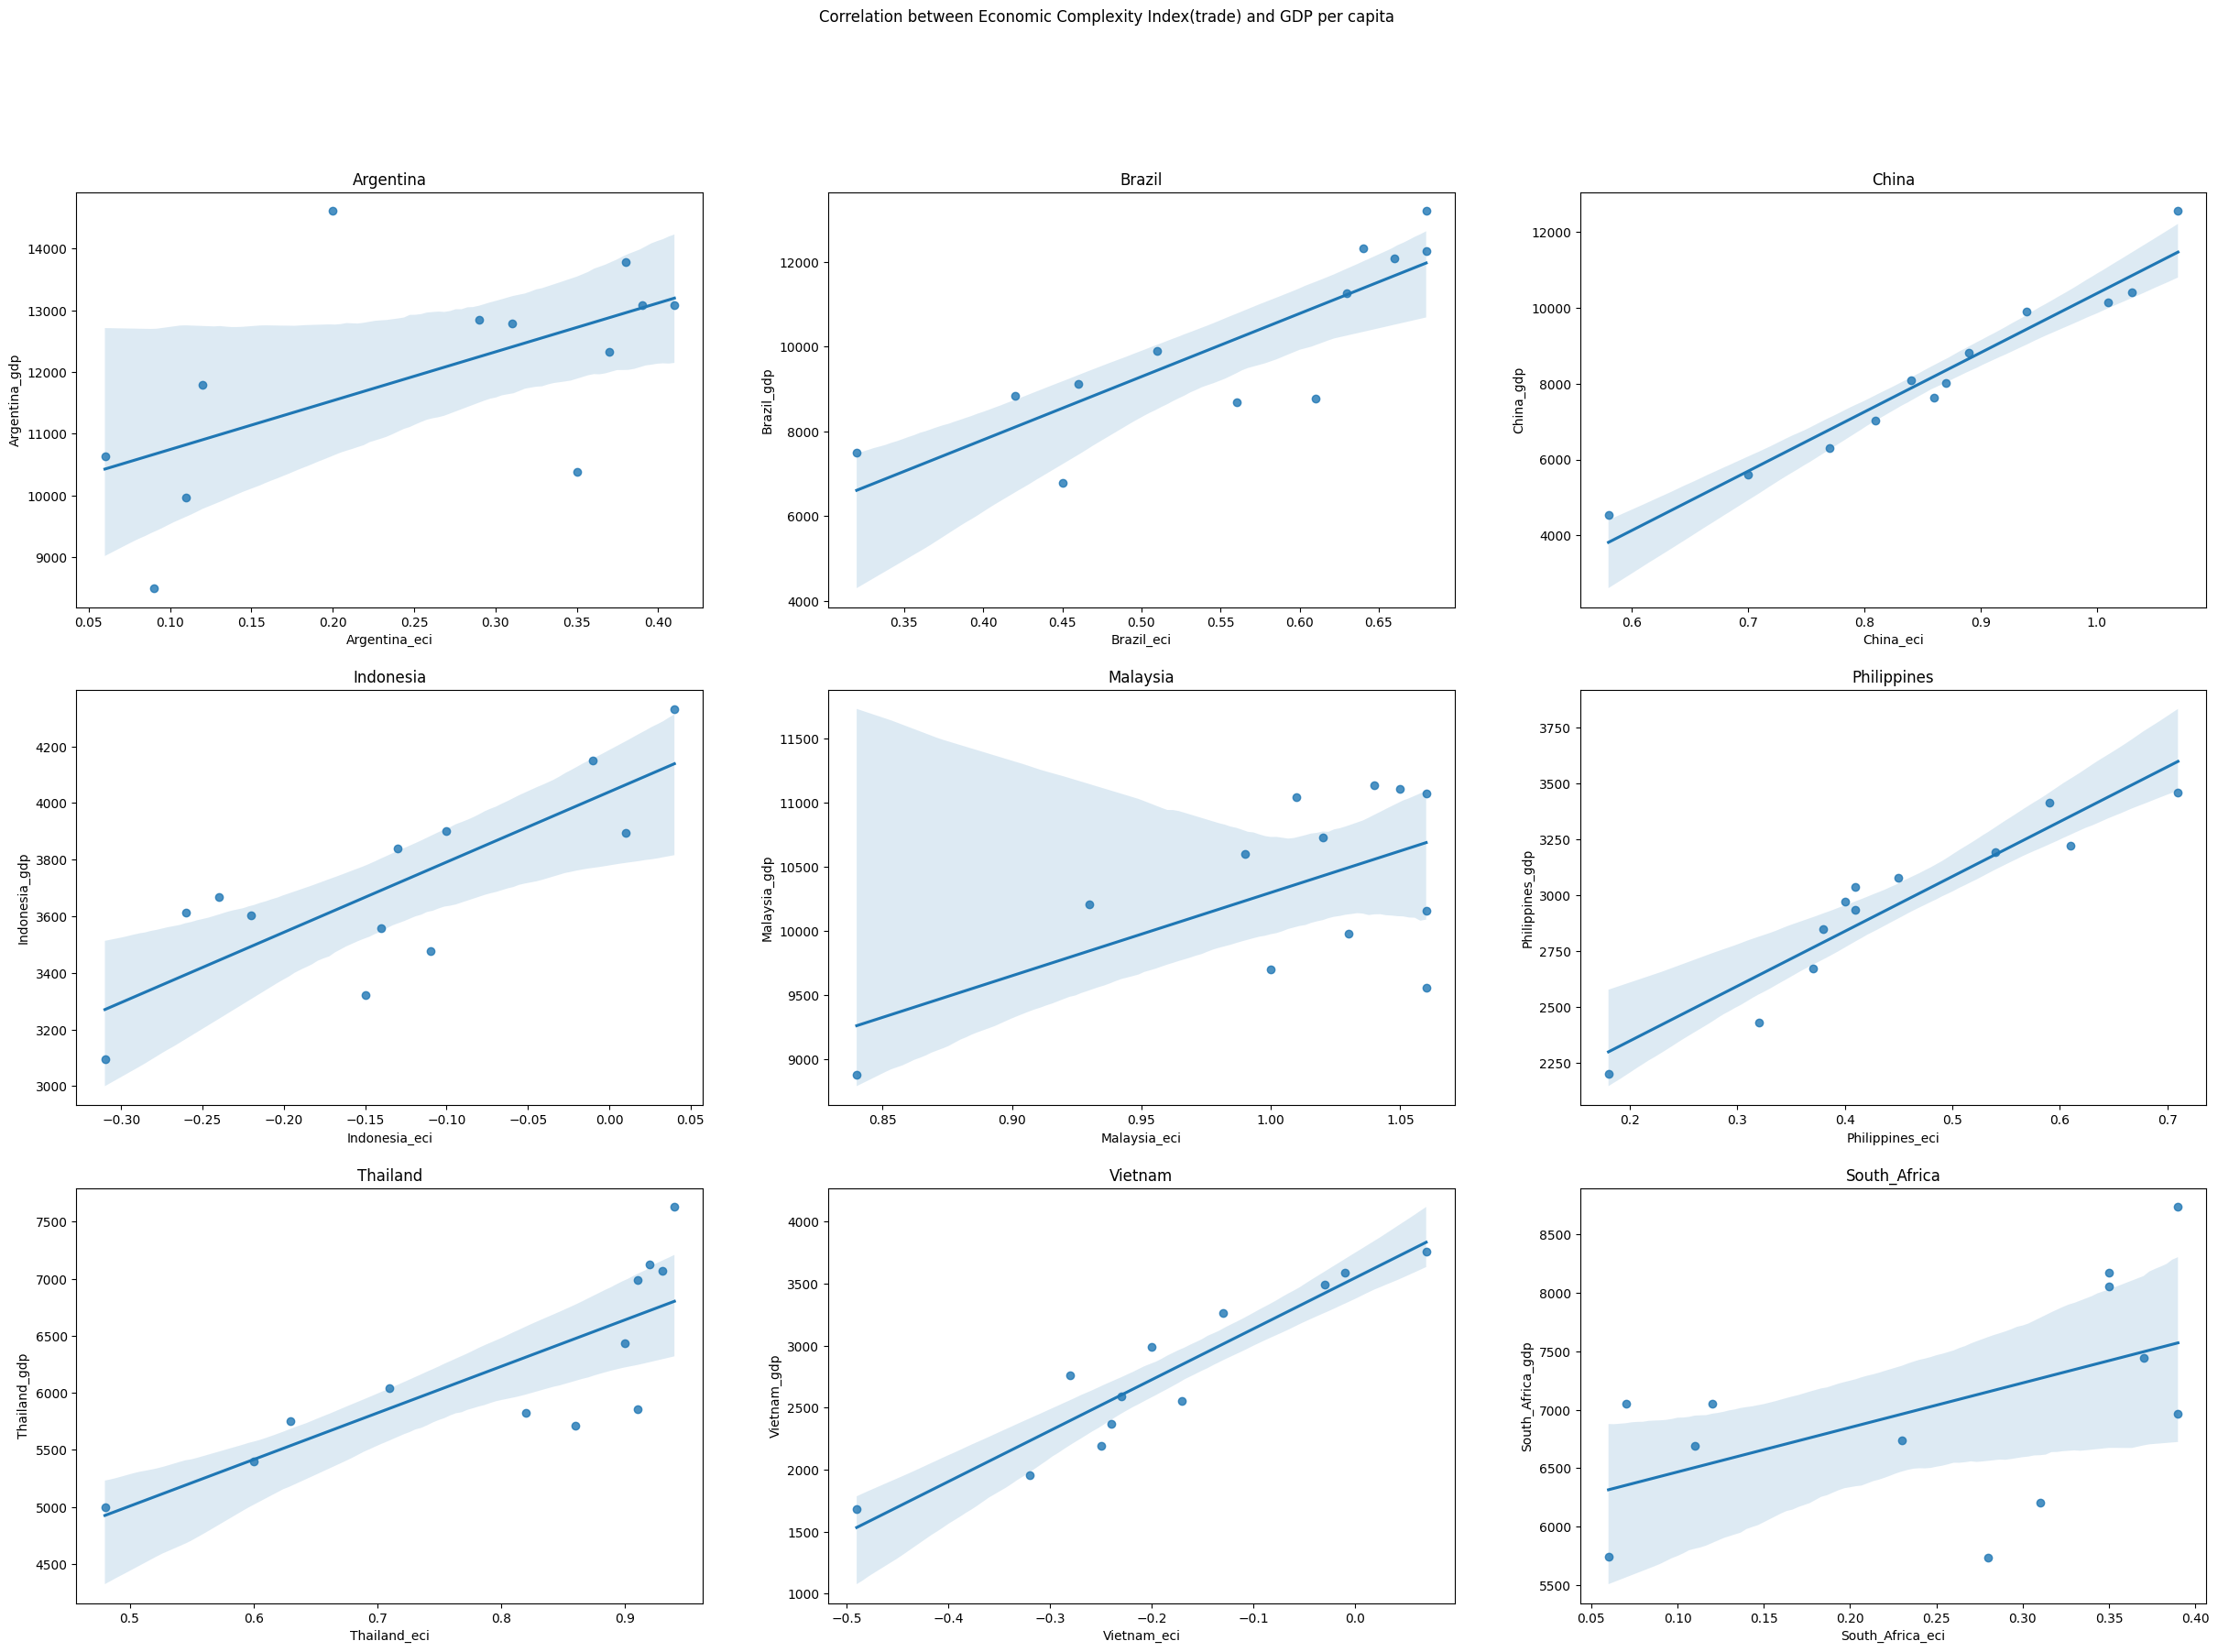

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

# Iterate over the countries
for i, country in enumerate(countries):
    # Get the current axis
    ax = axes[i // 3, i % 3]

    # Create a scatter plot for the current country
    sns.regplot(data=df, x=f'{country}_eci', y=f'{country}_gdp', ax=ax)

    # Set the title of the subplot
    ax.set_title(country)
    # Add a title to the figure
    fig.suptitle('Correlation between Economic Complexity Index(trade) and GDP per capita')
# Show the plot
plt.show()


In [ ]:
import pandas as pd
# Print the title
print('Correlation between GDP per Capita and Economic Complexity Index')

# Assuming your DataFrame is named `df`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Iterate over the countries
for country in countries:
    # Calculate the correlation between GDP and ECI for the current country
    corr = df[f'{country}_gdp'].corr(df[f'{country}_eci'])

    # Print the correlation
    print(f'{country}: {corr:.2f}')


Correlation between GDP per Capita and Economic Complexity Index
Argentina: 0.59
Brazil: 0.84
China: 0.97
Indonesia: 0.80
Malaysia: 0.58
Philippines: 0.94
Thailand: 0.79
Vietnam: 0.93
South_Africa: 0.52


In [ ]:
import statsmodels.api as sm
import numpy as np


# Assuming your DataFrame is named `df`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create empty lists to store the GDP and ECI data for all countries
x = []
y = []

# Iterate over the countries
for country in countries:
    # Append the GDP and ECI data for the current country to the lists
    x.extend(df[f'{country}_eci'])
    y.extend(df[f'{country}_gdp'])

# Convert the lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Add a constant term to the independent variable to include an intercept in the model
x = sm.add_constant(x)

# Fit a linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     44.18
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.33e-09
Time:                        02:18:54   Log-Likelihood:                -1014.1
No. Observations:                 108   AIC:                             2032.
Df Residuals:                     106   BIC:                             2038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5128.6968    402.171     12.753      0.0

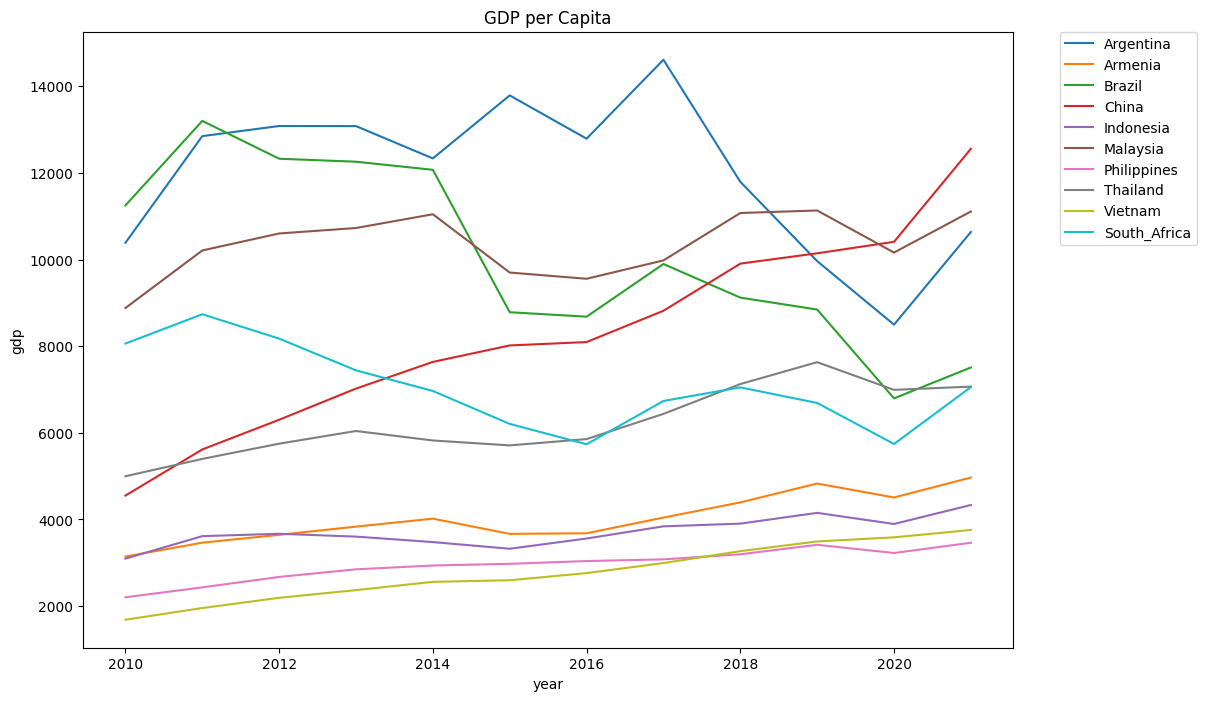

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`
countries = ['Argentina', 'Armenia', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create a new DataFrame with one row for each year-country combination
data = pd.melt(df, id_vars='year', value_vars=[f'{country}_gdp' for country in countries])

# Rename the columns
data.columns = ['year', 'country', 'gdp']

# Extract the country name from the column name
data['country'] = data['country'].str.replace('_gdp', '')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot with multiple lines
sns.lineplot(data=data, x='year', y='gdp', hue='country')

# Set the title of the plot
plt.title('GDP per Capita')

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


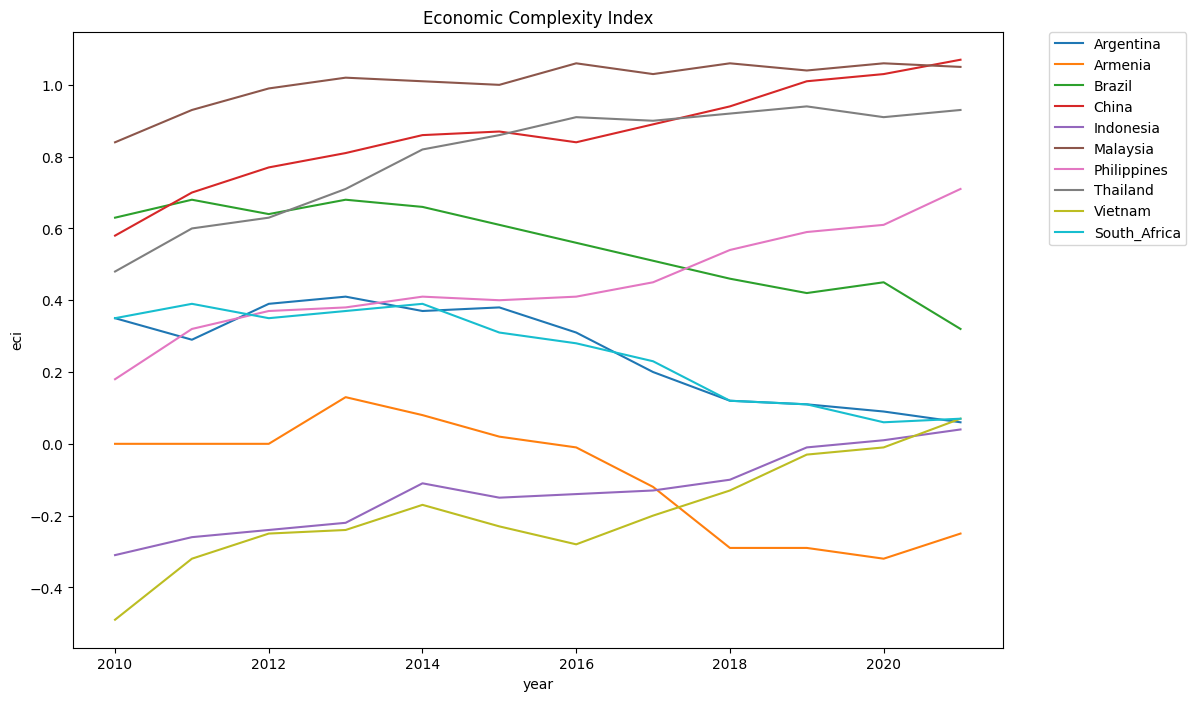

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`
countries = ['Argentina', 'Armenia','Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create a new DataFrame with one row for each year-country combination
data = pd.melt(df, id_vars='year', value_vars=[f'{country}_eci' for country in countries])

# Rename the columns
data.columns = ['year', 'country', 'eci']

# Extract the country name from the column name
data['country'] = data['country'].str.replace('_eci', '')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot with multiple lines
sns.lineplot(data=data, x='year', y='eci', hue='country')

# Set the title of the plot
plt.title('Economic Complexity Index')

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


In [ ]:
# Read the CSV data from the Google Sheets link
sheet_url2 = 'https://docs.google.com/spreadsheets/d/13GqkOnNgylc_loQWRbFw0iBWLFSRWbiKYZ1Gxrw6kvA/edit#gid=1029109255'
sheet_url_trf2 = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df2 = pd.read_csv(sheet_url_trf2) #define df to read csv

In [ ]:
# Assuming your DataFrame is named `df2`
df2 = df2.fillna(0)


In [ ]:
df2.head()

,year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South_Africa,Zambia,Zimbabwe
0,1991,0.0,7.333336,8.121,4.224595,4.489,10.307,0.0,11.663443,1.887,...,12.016,2.124,1.734,4.935554,2.100,0.0,8.342,21.194,18.900,4.997
1,1992,0.0,7.318747,8.168,4.335460,4.487,30.015,0.0,11.950448,1.858,...,12.275,1.938,1.751,5.082847,2.385,0.0,8.325,21.159,19.460,5.069
2,1993,0.0,7.242705,8.123,4.372125,4.531,25.258,0.0,12.661873,1.862,...,12.440,1.989,1.797,5.351633,2.632,0.0,8.365,20.971,19.700,5.010
3,1994,0.0,7.160694,8.111,4.366898,4.395,20.840,0.0,12.738380,1.810,...,12.252,1.945,1.622,5.610718,3.040,0.0,8.340,20.828,18.679,4.960
4,1995,0.0,7.063796,8.260,4.348996,4.304,14.611,0.0,13.216999,1.800,...,11.832,1.907,1.800,5.777608,3.189,0.0,8.967,20.750,16.858,5.654


In [ ]:
# Assuming your DataFrame is named `df2`
df2 = df2.rename(columns={col: col + '_unemp' for col in df2.columns if col != 'year'})


In [ ]:
df2.head()

,year,Aruba_unemp,Africa Eastern and Southern_unemp,Afghanistan_unemp,Africa Western and Central_unemp,Angola_unemp,Albania_unemp,Andorra_unemp,Arab World_unemp,United Arab Emirates_unemp,...,Virgin Islands (U.S.)_unemp,Vietnam_unemp,Vanuatu_unemp,World_unemp,Samoa_unemp,Kosovo_unemp,"Yemen, Rep._unemp",South_Africa_unemp,Zambia_unemp,Zimbabwe_unemp
0,1991,0.0,7.333336,8.121,4.224595,4.489,10.307,0.0,11.663443,1.887,...,12.016,2.124,1.734,4.935554,2.100,0.0,8.342,21.194,18.900,4.997
1,1992,0.0,7.318747,8.168,4.335460,4.487,30.015,0.0,11.950448,1.858,...,12.275,1.938,1.751,5.082847,2.385,0.0,8.325,21.159,19.460,5.069
2,1993,0.0,7.242705,8.123,4.372125,4.531,25.258,0.0,12.661873,1.862,...,12.440,1.989,1.797,5.351633,2.632,0.0,8.365,20.971,19.700,5.010
3,1994,0.0,7.160694,8.111,4.366898,4.395,20.840,0.0,12.738380,1.810,...,12.252,1.945,1.622,5.610718,3.040,0.0,8.340,20.828,18.679,4.960
4,1995,0.0,7.063796,8.260,4.348996,4.304,14.611,0.0,13.216999,1.800,...,11.832,1.907,1.800,5.777608,3.189,0.0,8.967,20.750,16.858,5.654


In [ ]:
# Assuming your DataFrame is named `df2`
print(df2.columns)


Index(['year', 'Aruba_unemp', 'Africa Eastern and Southern_unemp',
       'Afghanistan_unemp', 'Africa Western and Central_unemp', 'Angola_unemp',
       'Albania_unemp', 'Andorra_unemp', 'Arab World_unemp',
       'United Arab Emirates_unemp',
       ...
       'Virgin Islands (U.S.)_unemp', 'Vietnam_unemp', 'Vanuatu_unemp',
       'World_unemp', 'Samoa_unemp', 'Kosovo_unemp', 'Yemen, Rep._unemp',
       'South_Africa_unemp', 'Zambia_unemp', 'Zimbabwe_unemp'],
      dtype='object', length=267)


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df2`
columns = ['year', 'Argentina_unemp', 'Brazil_unemp', 'China_unemp', 'Indonesia_unemp', 'Malaysia_unemp', 'Philippines_unemp', 'Thailand_unemp', 'Vietnam_unemp', 'South_Africa_unemp']

# Filter `df2` to only include the specified columns
df2 = df2[columns]




In [ ]:
df2.head()

,year,Argentina_unemp,Brazil_unemp,China_unemp,Indonesia_unemp,Malaysia_unemp,Philippines_unemp,Thailand_unemp,Vietnam_unemp,South_Africa_unemp
0,1991,5.44,6.366,2.37,2.620,3.660,3.834,2.63,2.124,21.194
1,1992,6.36,6.420,2.37,2.730,3.710,3.802,1.35,1.938,21.159
2,1993,10.10,6.030,2.69,2.780,4.110,3.738,1.49,1.989,20.971
3,1994,11.76,6.470,2.90,4.370,3.655,3.661,1.35,1.945,20.828
4,1995,18.80,7.090,3.00,4.597,3.150,3.651,1.10,1.907,20.750


In [ ]:
import pandas as pd

# Assuming your DataFrames are named `df` and `df2`
years = range(2010, 2021)

# Filter `df` and `df1` to only include rows where the `year` column is in `years`
df = df[df['year'].isin(years)]
df2 = df2[df2['year'].isin(years)]


In [ ]:
# Assuming your DataFrames are named `df` and `df1`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Iterate over the countries
for country in countries:
    # Check the sizes of the arrays
    print(f'{country}_eci size:', df[f'{country}_eci'].size)
    print(f'{country}_unemp size:', df2[f'{country}_unemp'].size)

Argentina_eci size: 11
Argentina_unemp size: 11
Brazil_eci size: 11
Brazil_unemp size: 11
China_eci size: 11
China_unemp size: 11
Indonesia_eci size: 11
Indonesia_unemp size: 11
Malaysia_eci size: 11
Malaysia_unemp size: 11
Philippines_eci size: 11
Philippines_unemp size: 11
Thailand_eci size: 11
Thailand_unemp size: 11
Vietnam_eci size: 11
Vietnam_unemp size: 11
South_Africa_eci size: 11
South_Africa_unemp size: 11


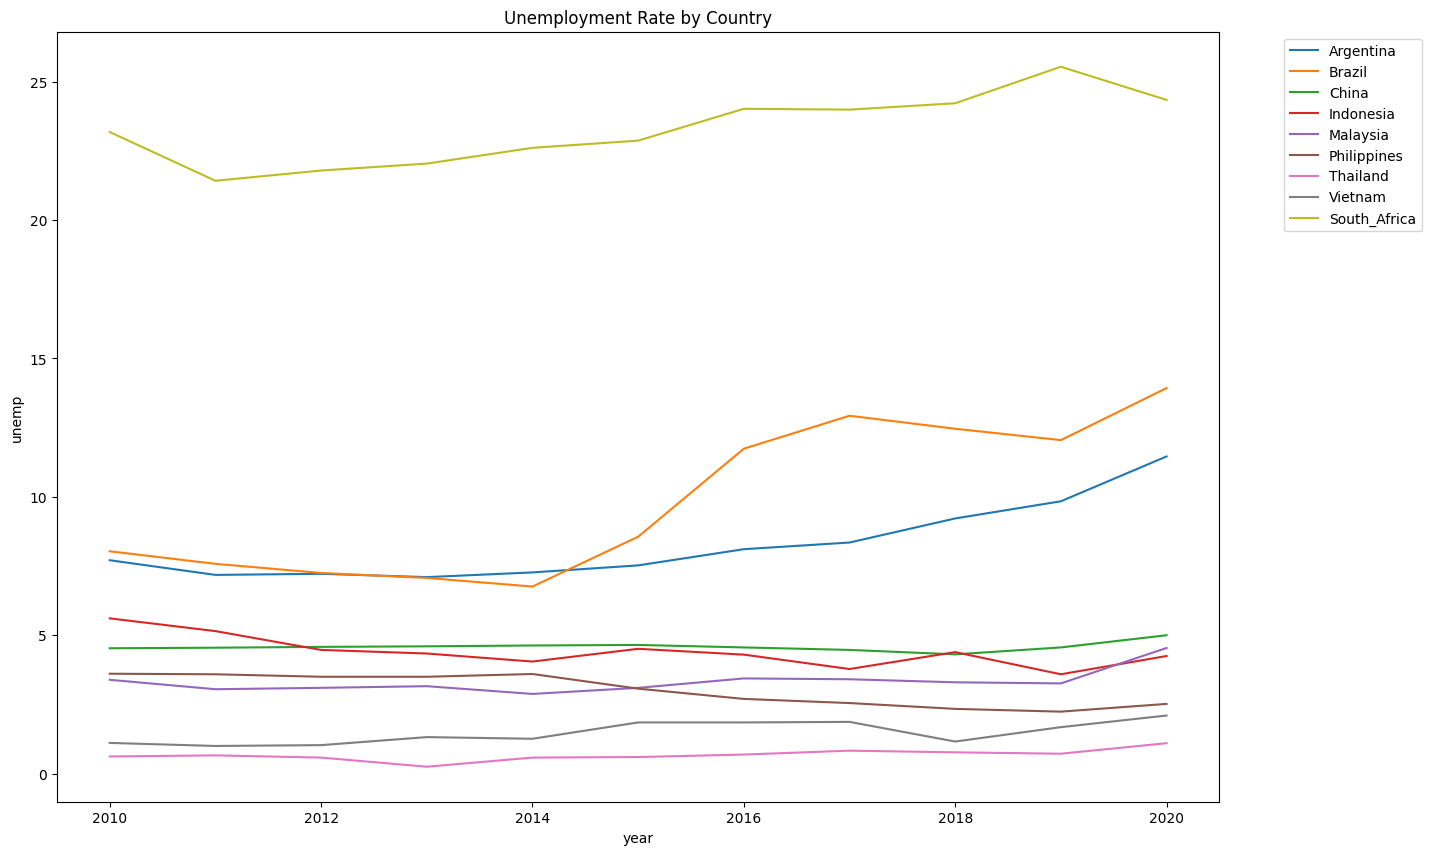

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df2`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Melt `df2` to transform it from wide to long format
df2_melted = df2.melt(id_vars='year', value_vars=[f'{country}_unemp' for country in countries], var_name='country', value_name='unemp')

# Replace the country names in `df2_melted` to remove the `_unemp` suffix
df2_melted['country'] = df2_melted['country'].str.replace('_unemp', '')

# Create a figure
fig, ax = plt.subplots(figsize=(15, 10))

# Create a line chart for all countries
sns.lineplot(data=df2_melted, x='year', y='unemp', hue='country', ax=ax)

# Set the title of the plot
ax.set_title('Unemployment Rate by Country')

# Move the legend outside of the chart
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


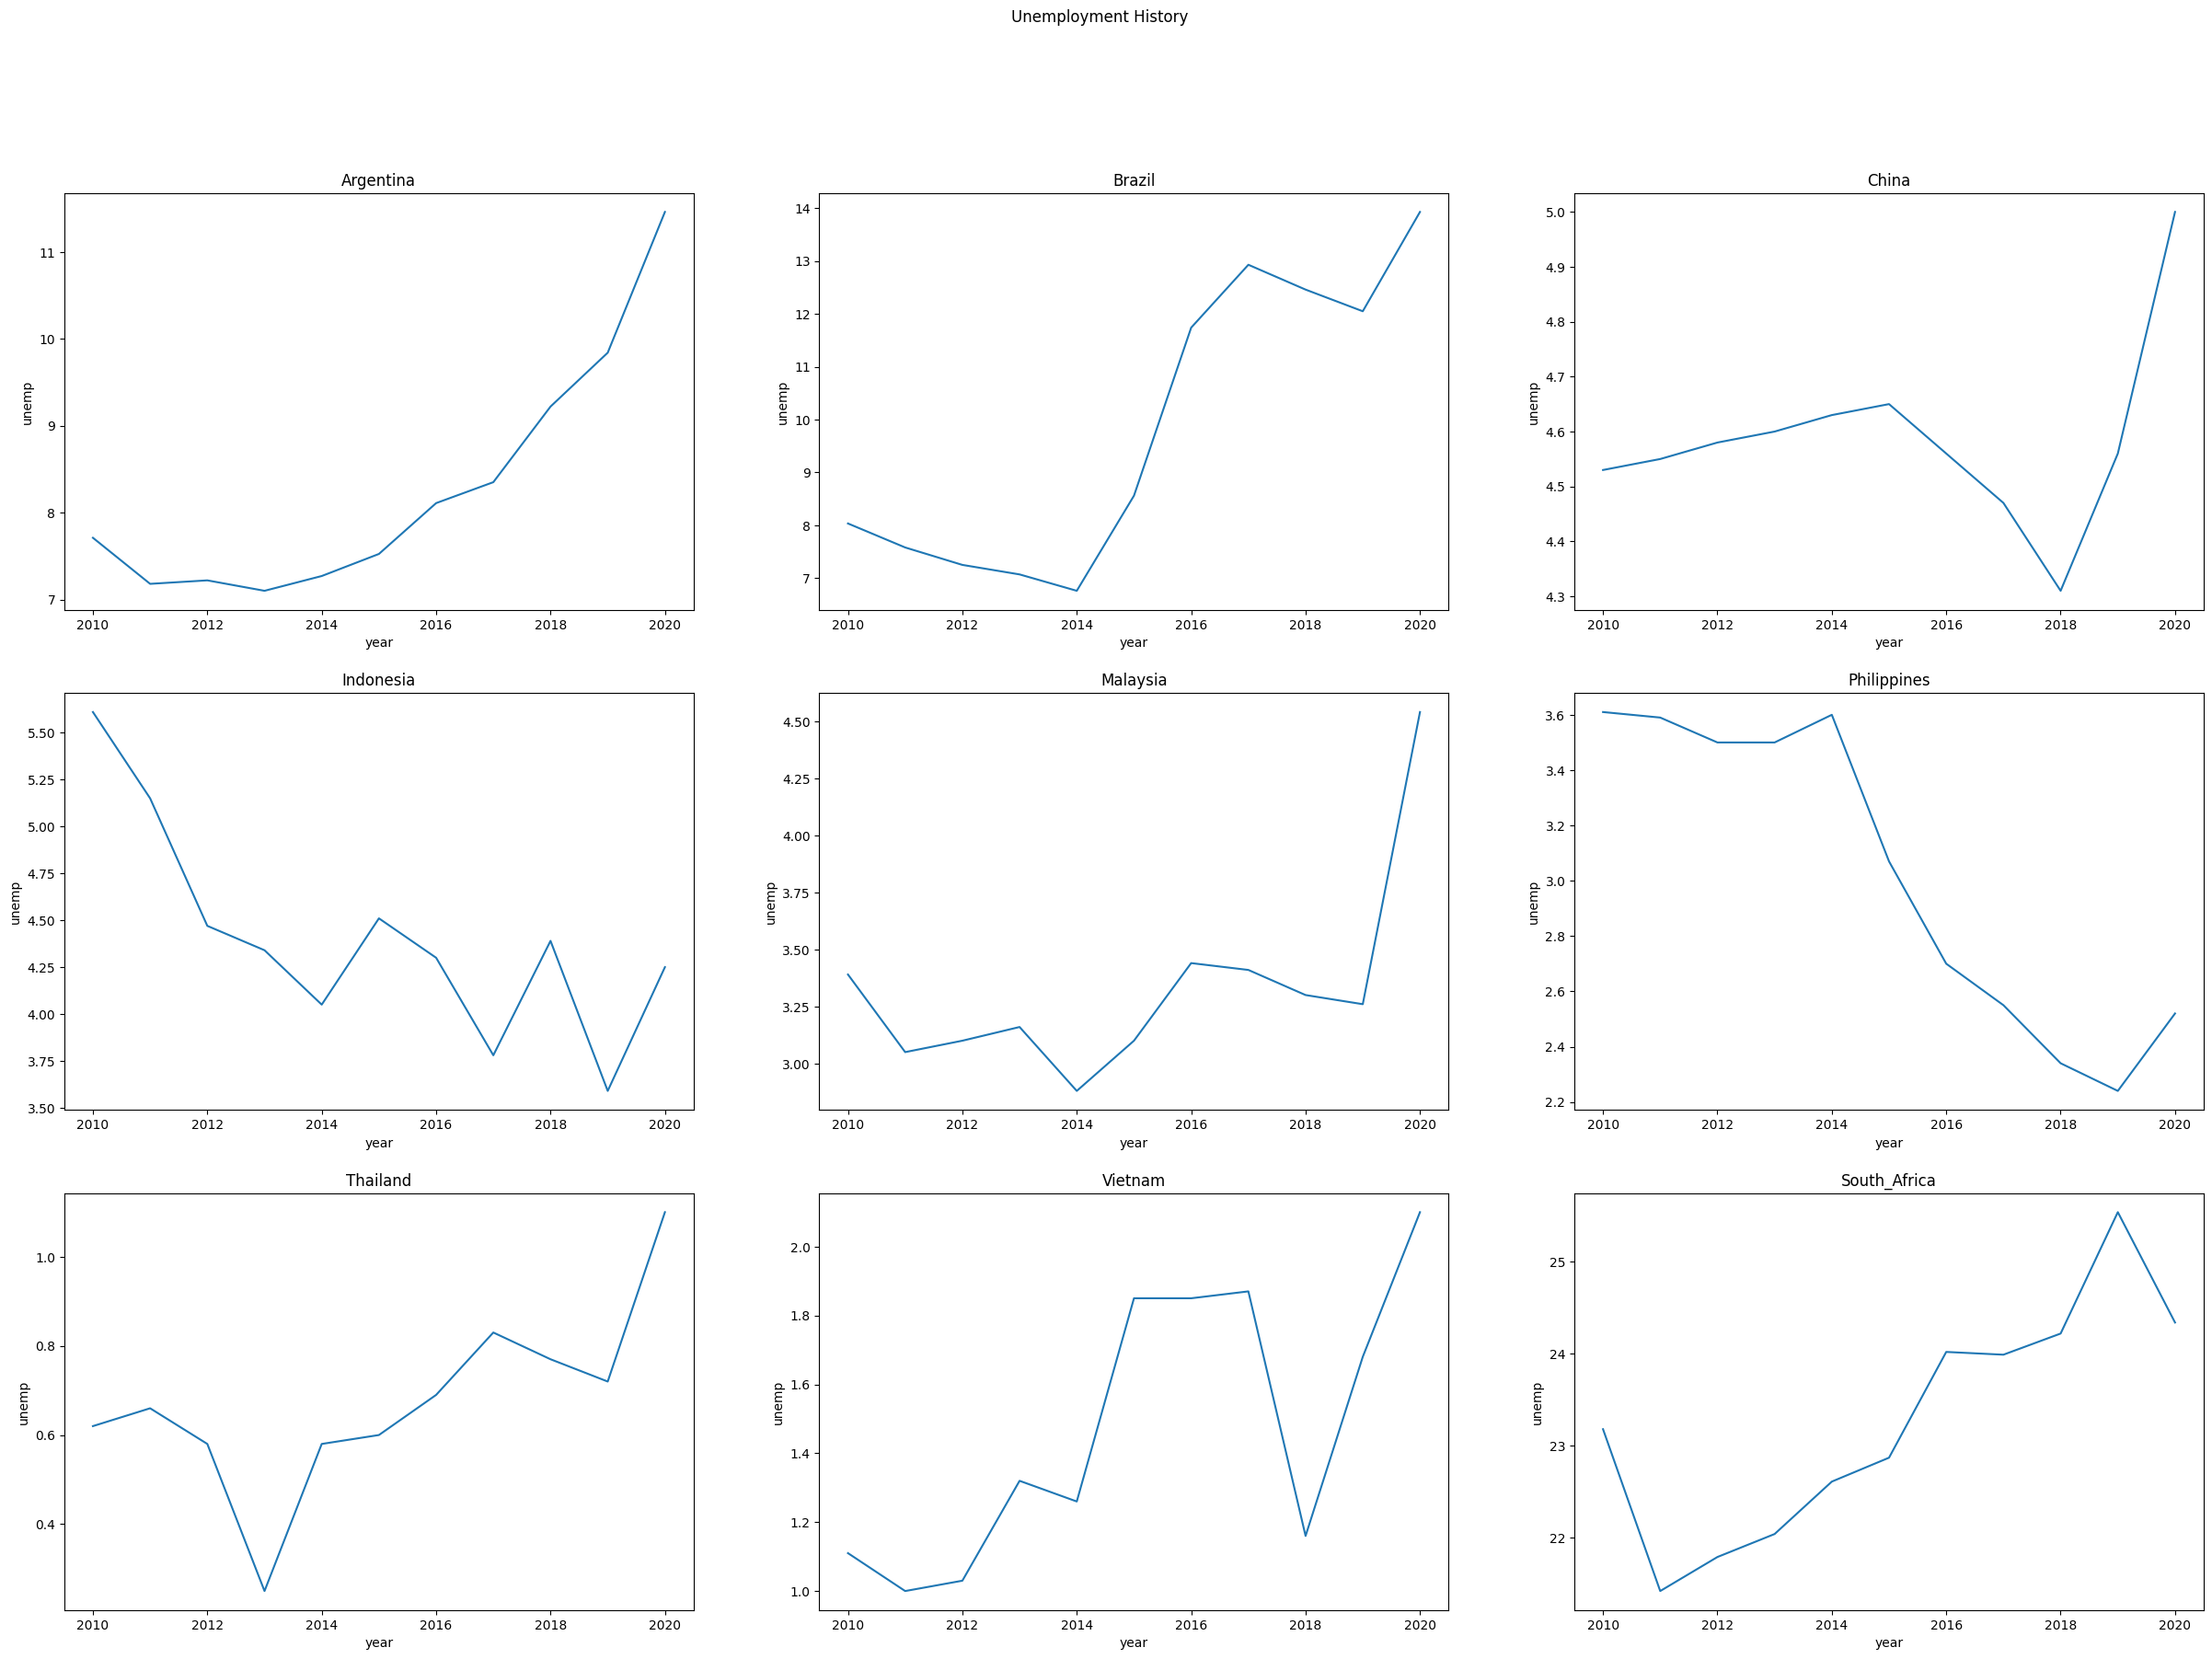

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df2`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Melt `df2` to transform it from wide to long format
df2_melted = df2.melt(id_vars='year', value_vars=[f'{country}_unemp' for country in countries], var_name='country', value_name='unemp')

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

# Iterate over the countries
for i, country in enumerate(countries):
    # Get the current axis
    ax = axes[i // 3, i % 3]

    # Filter `df1_melted` to only include rows for the current country
    data = df2_melted[df2_melted['country'] == f'{country}_unemp']

    # Create a line chart for the current country
    sns.lineplot(data=data, x='year', y='unemp', ax=ax) # line chart
    #sns.barplot(data=data, x='year', y='unemp', ax=ax) # bar chart

    # Set the title of the subplot
    ax.set_title(country)


# Add a title to the figure
fig.suptitle('Unemployment History')
# Show the plot
plt.show()


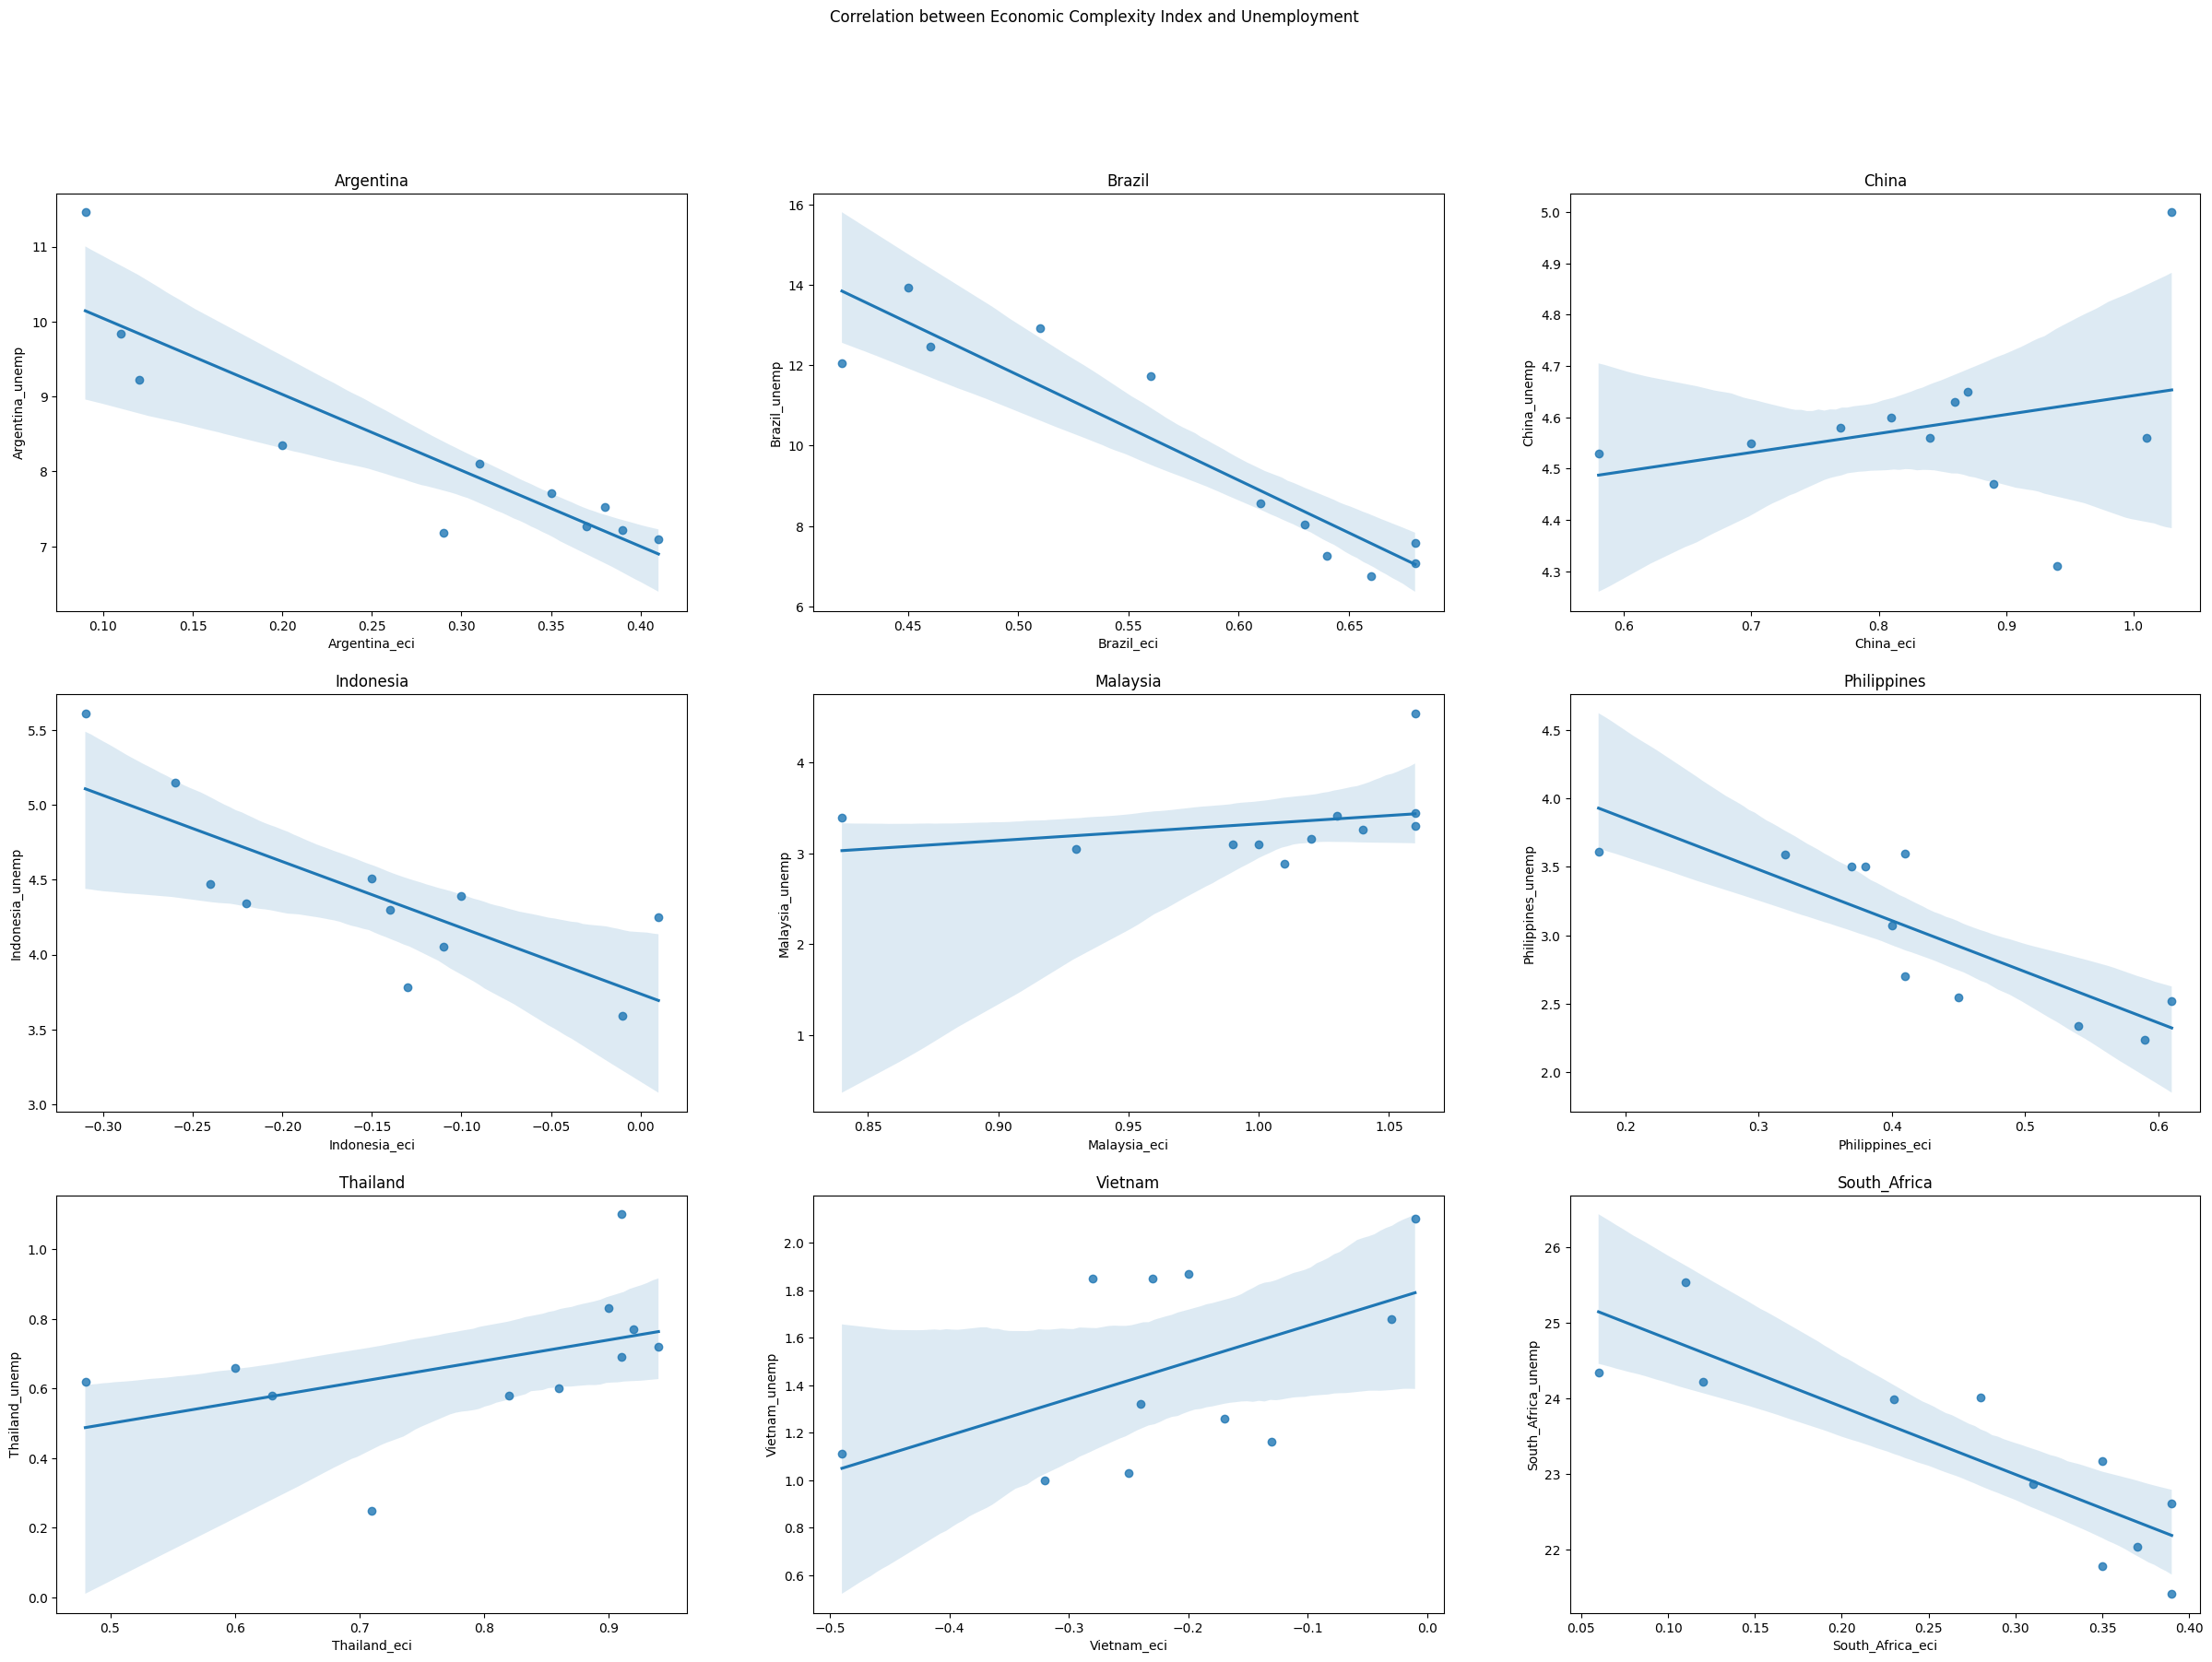

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are named `df` and `df2`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

# Iterate over the countries
for i, country in enumerate(countries):
    # Get the current axis
    ax = axes[i // 3, i % 3]

    # Create a scatter plot for the current country
    sns.regplot(x=df[f'{country}_eci'], y=df2[f'{country}_unemp'], ax=ax)

    # Set the title of the subplot
    ax.set_title(country)

# Add a title to the figure
fig.suptitle('Correlation between Economic Complexity Index and Unemployment')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
# Print the title
print('Correlation between Economic Complexity Index and Unemployment')

# Assuming your DataFrames are named `df` and `df2`
countries = ['Argentina', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Iterate over the countries
for country in countries:
    # Merge `df` and `df1` on the `year` column to create a new DataFrame
    merged_df = pd.merge(df[['year', f'{country}_eci']], df2[['year', f'{country}_unemp']], on='year')

    # Calculate the correlation between ECI and unemployment for the current country
    corr = merged_df[f'{country}_eci'].corr(merged_df[f'{country}_unemp'])

    # Print the correlation
    print(f'{country}: {corr:.2f}')


Correlation between Economic Complexity Index and Unemployment
Argentina: -0.90
Brazil: -0.93
China: 0.29
Indonesia: -0.78
Malaysia: 0.28
Philippines: -0.83
Thailand: 0.46
Vietnam: 0.52
South_Africa: -0.86


In [ ]:
# Read the CSV data from the Google Sheets link
sheet_url3 = 'https://docs.google.com/spreadsheets/d/1FW1BhDYe_si1TXmU45rojyCR6SkmnfmHqqGLPeQHH44/edit#gid=1172967148'
sheet_url_trf3 = sheet_url3.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df3 = pd.read_csv(sheet_url_trf3) #define df to read csv

In [ ]:
# Read the CSV data from the Google Sheets link
sheet_url4 = 'https://docs.google.com/spreadsheets/d/13GqkOnNgylc_loQWRbFw0iBWLFSRWbiKYZ1Gxrw6kvA/edit#gid=1029109255'
sheet_url_trf4 = sheet_url4.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df4 = pd.read_csv(sheet_url_trf4) #define df to read csv

In [ ]:
# Assuming your DataFrame is named `df3`
df3 = df3.rename(columns={col: col + '_gdp' for col in df3.columns if col != 'year'})

In [ ]:
# Assuming your DataFrame is named `df3`
df3 = df3.fillna(0)


In [ ]:
# Assuming your DataFrame is named `df4`
df4 = df4.rename(columns={col: col + '_unemp' for col in df4.columns if col != 'year'})

In [ ]:
# Assuming your DataFrame is named `df4`
df4 = df4.fillna(0)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df3`
columns = ['year', 'Argentina_gdp', 'Armenia_gdp', 'Brazil_gdp', 'China_gdp', 'Indonesia_gdp', 'Malaysia_gdp', 'Philippines_gdp', 'Thailand_gdp', 'Vietnam_gdp', 'South_Africa_gdp']

# Filter `df3` to only include the specified columns
df3 = df3[columns]


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df4`
columns = ['year', 'Argentina_unemp', 'Armenia_unemp', 'Brazil_unemp', 'China_unemp', 'Indonesia_unemp', 'Malaysia_unemp', 'Philippines_unemp', 'Thailand_unemp', 'Vietnam_unemp', 'South_Africa_unemp']

# Filter `df3` to only include the specified columns
df4 = df4[columns]

In [ ]:
df3.head()

,year,Argentina_gdp,Armenia_gdp,Brazil_gdp,China_gdp,Indonesia_gdp,Malaysia_gdp,Philippines_gdp,Thailand_gdp,Vietnam_gdp,South_Africa_gdp
0,1960,0.000000,0.0,232.998762,89.520542,0.0,244.612627,263.836862,103.800829,0.0,529.561923
1,1961,0.000000,0.0,229.336766,75.805838,0.0,235.531205,278.476991,110.731667,0.0,543.042224
2,1962,1163.186836,0.0,247.834300,70.909412,0.0,240.443328,164.133463,117.162114,0.0,560.699395
3,1963,855.275656,0.0,291.404006,74.313643,0.0,292.577730,177.332395,121.604327,0.0,601.599951
4,1964,1179.504098,0.0,254.838581,85.498555,0.0,302.678146,186.541259,129.579039,0.0,642.688431


In [ ]:
import pandas as pd

# Assuming your DataFrames are named `df` and `df1`
years = range(1991, 2021)

# Filter `df4` and `df3` to only include rows where the `year` column is in `years`
df4 = df4[df4['year'].isin(years)]
df3 = df3[df3['year'].isin(years)]

In [ ]:
df3.head()

,year,Argentina_gdp,Armenia_gdp,Brazil_gdp,China_gdp,Indonesia_gdp,Malaysia_gdp,Philippines_gdp,Thailand_gdp,Vietnam_gdp,South_Africa_gdp
31,1991,5730.723810,572.161763,2234.362688,333.142145,629.160680,2727.528585,821.453231,1751.068309,140.631004,3304.846330
32,1992,6815.618290,356.082213,2105.107748,366.460692,678.977737,3193.635381,936.148270,1957.407581,141.383685,3519.018571
33,1993,6957.417499,347.466463,2324.499775,377.389839,824.079149,3511.525808,938.763735,2230.842149,185.187122,3461.378400
34,1994,7464.474737,389.825287,3263.562622,473.492279,907.471786,3802.107621,1081.432956,2502.703873,224.637094,3547.949750
35,1995,7383.704510,441.894002,4704.961546,609.656679,1020.146681,4405.116764,1222.290947,2848.619712,281.133604,3904.308092


In [ ]:
df4.head()

,year,Argentina_unemp,Armenia_unemp,Brazil_unemp,China_unemp,Indonesia_unemp,Malaysia_unemp,Philippines_unemp,Thailand_unemp,Vietnam_unemp,South_Africa_unemp
0,1991,5.44,1.6,6.366,2.37,2.620,3.660,3.834,2.63,2.124,21.194
1,1992,6.36,1.8,6.420,2.37,2.730,3.710,3.802,1.35,1.938,21.159
2,1993,10.10,5.3,6.030,2.69,2.780,4.110,3.738,1.49,1.989,20.971
3,1994,11.76,6.6,6.470,2.90,4.370,3.655,3.661,1.35,1.945,20.828
4,1995,18.80,6.7,7.090,3.00,4.597,3.150,3.651,1.10,1.907,20.750


In [ ]:
import pandas as pd

# Assuming your DataFrames are named `df4` and `df3`
countries = ['Argentina', 'Armenia', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Print the title
print('Correlation between GDP per Capita and Unemployment')

# Iterate over the countries
for country in countries:
    # Merge `df4` and `df3` on the `year` column to create a new DataFrame
    merged_df = pd.merge(df4[['year', f'{country}_unemp']], df3[['year', f'{country}_gdp']], on='year')

    # Calculate the correlation between GDP and unemployment for the current country
    corr = merged_df[f'{country}_gdp'].corr(merged_df[f'{country}_unemp'])

    # Print the correlation
    print(f'{country}: {corr:.2f}')



Correlation between GDP per Capita and Unemployment
Argentina: -0.58
Armenia: 0.61
Brazil: -0.01
China: 0.69
Indonesia: -0.27
Malaysia: -0.12
Philippines: -0.78
Thailand: -0.73
Vietnam: -0.58
South_Africa: 0.45


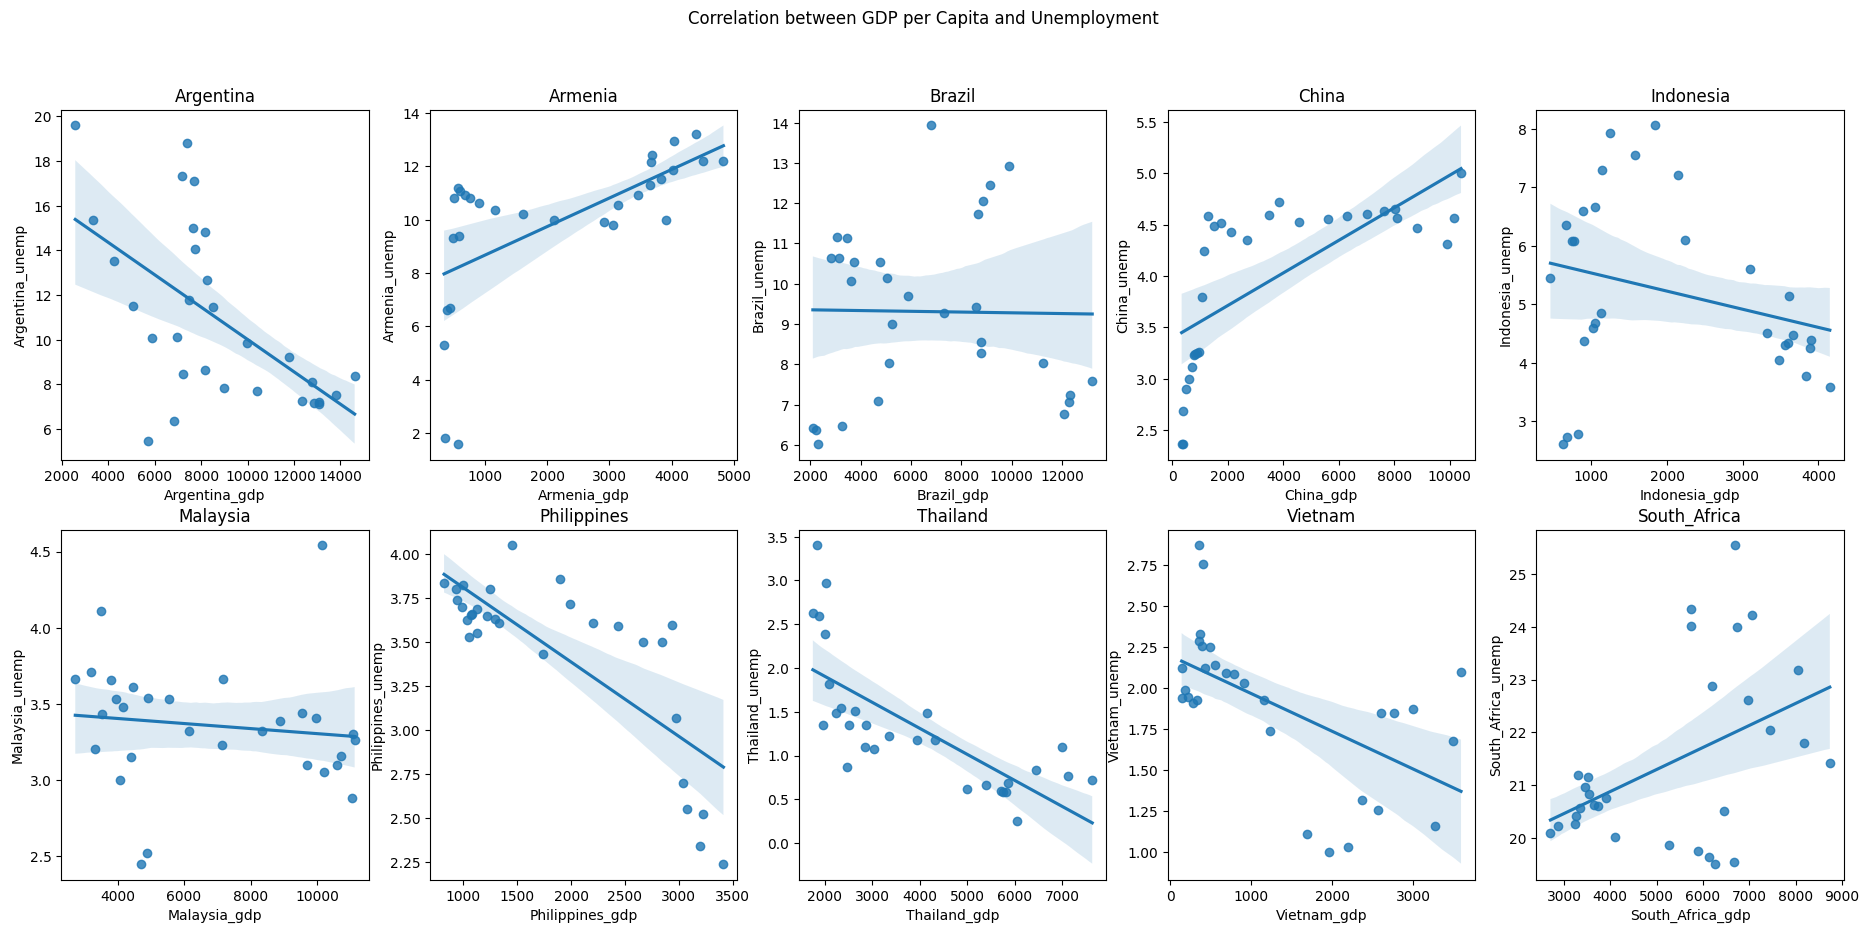

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are named `df2` and `df3`
countries = ['Argentina', 'Armenia', 'Brazil', 'China', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'South_Africa']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(23, 10))

# Iterate over the countries
for i, country in enumerate(countries):
    # Get the current axis
    ax = axes[i // 5, i % 5]

    # Create a scatter plot for the current country
    sns.regplot(x=df3[f'{country}_gdp'], y=df4[f'{country}_unemp'], ax=ax)

    # Set the title of the subplot
    ax.set_title(country)

# Add a title to the figure
fig.suptitle('Correlation between GDP per Capita and Unemployment')

# Show the plot
plt.show()
